# Data Science Problem

We (Group 5: Bassa, Jen, Thomaz, Catherine) are public health researchers and have been tasked with identifying and understanding predictors of CVD in patient populations located in high-income countries.  Our employer, a group of medical professionals, is concerned with high CVD mortality among their patient population and seeks to identify better screening methods for CVD. Therefore, our goal is to identify the predictors most correlated with CVD; this will aid medical professionals in optimizing their CVD screening algorithms.

**Data Science Question:** Which predictors are associated with CDV?

---

### Data Sources
1. [Heart Statlog](https://www.kaggle.com/sid321axn/heart-statlog-cleveland-hungary-final)
1. [CHD](https://chronicdata.cdc.gov/500-Cities-Places/PLACES-Census-Tract-Data-GIS-Friendly-Format-2020-/yjkw-uj5s/data)

# Table of content
1. **Heart StatLog**
    1. [Cleaning and EDA](#eda)
    1. [Trying To Use Polynomial Transformations](#poly)
    1. [Comparing Poly Vs Normal ds](#basic_modeling)
    1. [Reading in and bringing Bassa's cleaning and feature Engineering](#bassa_read_in)
    1. [Making a Function to Compare Different Cleaning Methods and Model Scores](#base_scores)
    1. [Combining my and Bassa's idea to get a better Model Eval Score](#Combining_ideas)
    1. [Cleaning the Poly from previous step to get rid of some features](#tb_clean)
    1. [GridSearches](#gridsearches)
        1. [Logistic](#hlog)
        1. [Ada Boosting](#ada)
        1. [Gradient Boosting](#gb)
        1. [Random Forest](#rf)
        1. [Decision Tree](#dt)
        1. [SVC](#svc)
        1. [KNN](#hknn)
        1. [BNB](#hbnb)
        1. [NN](#nn)
        1. [Gradient Boost 2](#gd_boost2)
        1. [Voting Classifier](#voting)
        1. [Grid Search Scores](#gridsearch_scores)
    1. [Analysis Based off the Best Model](#hanalysis)
    1. [Conclusions & Recommendations](#hcnr)
1. **Jen's CHD Dataset**  
    1. [Data Dictionary](#jen)
    1. [Cleaning and Engineering](#jclean)
    1. **[Regression](#reg_eda)**
        1. [Regression Modeling](#reg_mod)
        1. [Linear Regression](#linear)
        1. [Ridge](#ridge)
        1. [Lasso](#lasso)
        1. [Regression Results](#reg_results)
        1. [Conclusions](#reg_conclusions)
    1. **[Classification](#classification)**
        1. [Cleaning/EDA & Engineering to be able to do a classification model](#cclean)
        1. [Classification Modeling](#cmodel)
        1. [Logistic Regression](#logreg)
        1. [KNN](#knn)
        1. [Bernuolli Naive Bayes](#bnb)
        1. [Conclusions](#class_con)
        

<img src ='./imgs/Data Dictionary.png'>

## Imports

In [1]:
# basic dataframe libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodel
import statsmodels.api as sm

# sklearn stuff
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,  classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Keras stuff
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
# timeit to get how long it will take something will run
import timeit as ti

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [2]:
heart = pd.read_csv('./data/heart_statlog_cleveland_hungary_final (1).csv')
heart

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Cleaning and Data exploration <span id = 'eda'>
___

### Check for null values

In [3]:
heart.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
heart.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

### Columns i'll want to make into categorical instead of numeric
1. 'chest pain type'
> Value 1: typical angina  
Value 2: atypical angina  
Value 3: non-anginal pain  
Value 4: asymptomatic

1. 'resting ecg'
> Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

1. 'ST slope'
> Value 1: upsloping  
Value 2: flat  
Value 3: downsloping

In [5]:
heart['chest pain type'] = heart['chest pain type'].map({1:'TA', 2:'ATA', 3: 'NAP', 4:'Asympt' })
heart['resting ecg'] = heart['resting ecg'].map({0:'normal', 1:'ST-T abnormal', 2: 'lv hypertrophy'})
heart['ST slope'] = heart['ST slope'].map({1:'upsloping', 2:'flat', 3:'downslopping'})
heart.head(3)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,ATA,140,289,0,normal,172,0,0.0,upsloping,0
1,49,0,NAP,160,180,0,normal,156,0,1.0,flat,1
2,37,1,ATA,130,283,0,ST-T abnormal,98,0,0.0,upsloping,0


### Check Correlations of numeric parameters

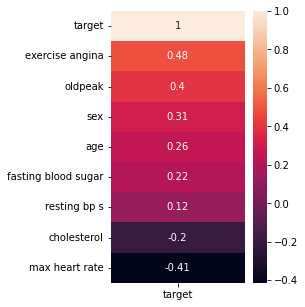

In [6]:
corr = heart.corr()

plt.figure(figsize = (3, 5))
sns.heatmap(corr[['target']].sort_values(by = 'target',ascending = False),
            annot = True)
plt.show()

**Observations**  
> 1. I expected `cholesterol` to have a higher correlation tbh.  
> 2. `max heart rate` has a strong negative correlation (i'm assuming) because the faster the heart can pump the better it is???
> 3. It also appears that if `sex` is male, the more likely they are to have some heart disease

<span id='poly'></span>
## Lets try to do some polytransformations and see if we can get the correlations up a bit

In [7]:
# Lets choose specific columns first
numeric_features = heart._get_numeric_data().columns.drop('target')

poly = PolynomialFeatures(include_bias=False)
df = poly.fit_transform(heart[numeric_features])

# make it into a dateframe 
poly_df = pd.DataFrame(data = df, columns = poly.get_feature_names(numeric_features))
poly_df.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,age^2,age sex,...,fasting blood sugar^2,fasting blood sugar max heart rate,fasting blood sugar exercise angina,fasting blood sugar oldpeak,max heart rate^2,max heart rate exercise angina,max heart rate oldpeak,exercise angina^2,exercise angina oldpeak,oldpeak^2
0,40.0,1.0,140.0,289.0,0.0,172.0,0.0,0.0,1600.0,40.0,...,0.0,0.0,0.0,0.0,29584.0,0.0,0.0,0.0,0.0,0.00
1,49.0,0.0,160.0,180.0,0.0,156.0,0.0,1.0,2401.0,0.0,...,0.0,0.0,0.0,0.0,24336.0,0.0,156.0,0.0,0.0,1.00
2,37.0,1.0,130.0,283.0,0.0,98.0,0.0,0.0,1369.0,37.0,...,0.0,0.0,0.0,0.0,9604.0,0.0,0.0,0.0,0.0,0.00
3,48.0,0.0,138.0,214.0,0.0,108.0,1.0,1.5,2304.0,0.0,...,0.0,0.0,0.0,0.0,11664.0,108.0,162.0,1.0,1.5,2.25
4,54.0,1.0,150.0,195.0,0.0,122.0,0.0,0.0,2916.0,54.0,...,0.0,0.0,0.0,0.0,14884.0,0.0,0.0,0.0,0.0,0.00


In [8]:
# add in our target so we can check correlation
poly_df['target'] = heart['target']

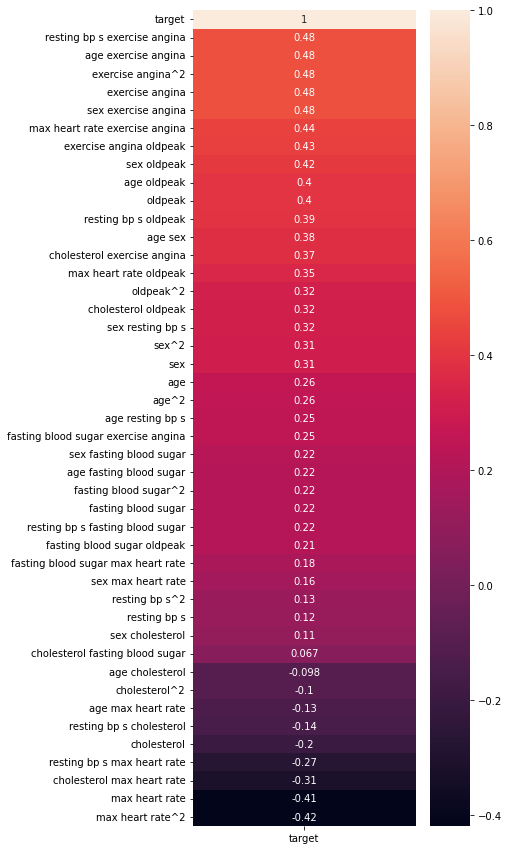

In [9]:
# Check our new correlation
corr = poly_df.corr()

plt.figure(figsize = (5, 15))
sns.heatmap(corr[['target']].sort_values(by = 'target',ascending = False),
            annot = True)
plt.show()

**Observations**  
> It does appear that doing the poly fit has helped. Will run a cross_val_score check as a baseline on both to check though

<span id ='basic_modeling'></span>
## Splitting the Data for both the heart and poly_df

In [10]:
# only using numeric features how much the polytrans will affect scores without the categorical columns
X_heart = heart[numeric_features]
X_poly = poly_df.drop('target', axis = 1)
y = heart['target']

In [11]:
X_heart_train, X_heart_test, y_train, y_test = train_test_split(X_heart, y, stratify=y, random_state= 1996)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, stratify=y, random_state= 1996)

In [12]:
# Scaling the data for only the trains since we aren't looking at test rn
sc = StandardScaler()
X_heart_train = sc.fit_transform(X_heart_train)
X_poly_train = sc.fit_transform(X_poly_train)

In [13]:
print(cross_val_score(LogisticRegression(max_iter=10_000), X_heart_train, y_train, cv = 5).mean())
print(cross_val_score(LogisticRegression(max_iter=10_000), X_poly_train, y_train, cv = 5).mean())

0.7992781369656645
0.8127550059632164


**Observation**
> The polytransforming does seem to help a bit, but only by 2%, however keep in mind that this is without the categorical columns as well as no gridsearch, out final score might be even higher

In [14]:
cat_col = list(set(heart.columns) - set(numeric_features))
cat_col.remove('target')
cat_col

['chest pain type', 'ST slope', 'resting ecg']

In [15]:
# Lets make these columns into dummies to append to the X_poly df
dummy_df = pd.get_dummies(data = heart[cat_col], drop_first=True)
dummy_df.head()

,chest pain type_Asympt,chest pain type_NAP,chest pain type_TA,ST slope_flat,ST slope_upsloping,resting ecg_lv hypertrophy,resting ecg_normal
0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,1
2,0,0,0,0,1,0,0
3,1,0,0,1,0,0,1
4,0,1,0,0,1,0,1


In [16]:
## add the dummy to X_poly
X_poly_dummy = X_poly.join(dummy_df)
X_poly_dummy.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,age^2,age sex,...,exercise angina^2,exercise angina oldpeak,oldpeak^2,chest pain type_Asympt,chest pain type_NAP,chest pain type_TA,ST slope_flat,ST slope_upsloping,resting ecg_lv hypertrophy,resting ecg_normal
0,40.0,1.0,140.0,289.0,0.0,172.0,0.0,0.0,1600.0,40.0,...,0.0,0.0,0.00,0,0,0,0,1,0,1
1,49.0,0.0,160.0,180.0,0.0,156.0,0.0,1.0,2401.0,0.0,...,0.0,0.0,1.00,0,1,0,1,0,0,1
2,37.0,1.0,130.0,283.0,0.0,98.0,0.0,0.0,1369.0,37.0,...,0.0,0.0,0.00,0,0,0,0,1,0,0
3,48.0,0.0,138.0,214.0,0.0,108.0,1.0,1.5,2304.0,0.0,...,1.0,1.5,2.25,1,0,0,1,0,0,1
4,54.0,1.0,150.0,195.0,0.0,122.0,0.0,0.0,2916.0,54.0,...,0.0,0.0,0.00,0,1,0,0,1,0,1


In [17]:
# One last check score check with the original df vs poly with all columns now
## Make the dummy_df full
heart_dummy = pd.get_dummies(data = heart, columns=cat_col)
heart_dummy.head(3)

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_ATA,chest pain type_Asympt,chest pain type_NAP,chest pain type_TA,ST slope_downslopping,ST slope_flat,ST slope_upsloping,resting ecg_ST-T abnormal,resting ecg_lv hypertrophy,resting ecg_normal
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,0,1,1,0,0


In [18]:
# make a new X since the target is still here
X_heart = heart_dummy.drop('target', axis = 1)

X_heart_train, X_heart_test, y_train, y_test = train_test_split(X_heart, y, stratify=y, random_state= 1996)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, stratify=y, random_state= 1996)

In [19]:
sc = StandardScaler()
X_heart_train = sc.fit_transform(X_heart_train)
X_poly_train = sc.fit_transform(X_poly_train)

In [20]:
print(cross_val_score(LogisticRegression(max_iter=20_000, tol = 0.1), X_heart_train, y_train, cv = 5).mean())
print(cross_val_score(LogisticRegression(max_iter=20_000, tol = 0.1,), X_poly_train, y_train, cv = 5).mean())

0.8509384219446362
0.8127550059632164


**Observation**
> While both the testing set averages went up, the difference between the two are now only around 0.4%. I would still like to go forward with the poly set though. It is a a bit better and we can try getting rid of some columns and keeping what has a higher coef

# Bassa's way of setting up the Data <span id='bassa_read_in'>

### reading in the data

In [21]:
hrt_dt = pd.read_csv("./data/heart_statlog_cleveland_hungary_final (1).csv")

### Feature Engineering

In [22]:
hrt_dt["ST slope_sqr"] = hrt_dt["ST slope"]**2
hrt_dt["chest pain type_sqr"]  = hrt_dt["chest pain type"]**2
hrt_dt["ST slope*chest pain type"] = hrt_dt["ST slope"]*hrt_dt["chest pain type"] 
hrt_dt["ST slope*cholesterol"] = hrt_dt["cholesterol"]*hrt_dt["ST slope"]
hrt_dt["cholesterol*max heart rate"] = hrt_dt["max heart rate"]*hrt_dt["cholesterol"]

<span id = 'base_scores'></span>
## Making a function to return multiple test results (No hyperParams) in a DF

In [23]:
base_df = pd.DataFrame(columns=['Notes','Log_train', 'Log_test','Bag_train', 'Bag_test',
                                'Ada_boost_train', 'Ada_boost_test','Grad_train',
                                'Grad_test','RF_train','RF_test',
                                'SVC_train','SVC_test', 'KNN_train', 'KNN_test'])
base_df

,Notes,Log_train,Log_test,Bag_train,Bag_test,Ada_boost_train,Ada_boost_test,Grad_train,Grad_test,RF_train,RF_test,SVC_train,SVC_test,KNN_train,KNN_test


In [24]:
# purpose to get number of different test accuracy quickly to see if getting rid of features help or not beore testing
def base_scores(X, y, note):
    # Set up general train test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.3, random_state =22)
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.transform(X_test)
    
    # Results for Logistic Regression
    log_model = LogisticRegression(max_iter=2_000)
    log_model.fit(X_train_ss, y_train)
    log_train = log_model.score(X_train_ss, y_train)
    log_test = log_model.score(X_test_ss, y_test)

    
    # Results for Bagging
    bag = BaggingClassifier(random_state=42)
    bag.fit(X_train, y_train)
    bag_train = bag.score(X_train, y_train)
    bag_test = bag.score(X_test, y_test)

    
    # Ada Boosting no base estimator
    adabost = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2))
    adabost.fit(X_train, y_train)
    ada_train = adabost.score(X_train, y_train)
    ada_test = adabost.score(X_test, y_test)

    
    # Gradient Boosting
    base_gbost = GradientBoostingClassifier()
    base_gbost.fit(X_train, y_train)
    base_gb_train = base_gbost.score(X_train, y_train)
    base_gb_test = base_gbost.score(X_test, y_test)

    
    # RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_train = rf.score(X_train, y_train)
    rf_test = rf.score(X_test, y_test)
    
    
    # SVM
    svc = SVC()
    svc.fit(X_train_ss, y_train)
    svc_train = svc.score(X_train_ss, y_train)
    svc_test = svc.score(X_test_ss, y_test)

    
    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train_ss, y_train)
    knn_train = knn.score(X_train_ss, y_train)
    knn_test = knn.score(X_test_ss, y_test)
    
    
    # adding all the information to a dataframe
    info_list = []
    d = {}
    d['Notes'] = note
    d['Log_train'] = log_train
    d['Log_test'] = log_test
    d['Bag_train'] = bag_train
    d['Bag_test'] = bag_test
    d['Ada_boost_train'] = ada_train
    d['Ada_boost_test'] = ada_test
    d['Grad_train'] = base_gb_train
    d['Grad_test'] = base_gb_test
    d['RF_train'] = rf_train
    d['RF_test'] = rf_test
    d['SVC_train'] = svc_train
    d['SVC_test'] = svc_test
    d['KNN_train'] = knn_train
    d['KNN_test'] = knn_test
    
    # appending all this information to a list to add to the dataframe base_df
    info_list.append(d)
    return base_df.append(info_list)

In [25]:
def graph_scores(X, y):
    # Set up general train test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.3, random_state =22)
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.transform(X_test)
  
    testing_accuracy_dict = {}
    # Results for Logistic Regression
    log_model = LogisticRegression(max_iter=2000)
    log_model.fit(X_train_ss, y_train)

    testing_accuracy_dict["log_model"] = []
    testing_accuracy_dict["log_model"].append(log_model.score(X_train_ss, y_train))
    testing_accuracy_dict["log_model"].append(log_model.score(X_test_ss, y_test))
     
    # Results for Bagging
    bag_modle = BaggingClassifier(random_state=42)
    bag_modle.fit(X_train, y_train)

    testing_accuracy_dict["bag_model"] = []
    testing_accuracy_dict["bag_model"].append(bag_modle.score(X_train, y_train))
    testing_accuracy_dict["bag_model"].append(bag_modle.score(X_test, y_test))
    # Ada Boosting no base estimator
    adabost = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2))
    adabost.fit(X_train, y_train)

    # Gradient Boosting
    base_gbost = GradientBoostingClassifier()
    base_gbost.fit(X_train, y_train)

    testing_accuracy_dict["base_gbost"] = []
    testing_accuracy_dict["base_gbost"].append(base_gbost.score(X_train, y_train))
    testing_accuracy_dict["base_gbost"].append(base_gbost.score(X_test, y_test))
    
    # RandomForest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    
    testing_accuracy_dict["rf_model"] = []
    testing_accuracy_dict["rf_model"].append(rf_model.score(X_train, y_train))
    testing_accuracy_dict["rf_model"].append(rf_model.score(X_test, y_test))
    
    
    # SVM
    svc_model = SVC()
    svc_model.fit(X_train_ss, y_train)

    
    testing_accuracy_dict["svc_model"] = []
    testing_accuracy_dict["svc_model"].append(svc_model.score(X_train, y_train))
    testing_accuracy_dict["svc_model"].append(svc_model.score(X_test, y_test))
    
    # KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_ss, y_train)

    testing_accuracy_dict["knn_model"] = []
    testing_accuracy_dict["knn_model"].append(knn_model.score(X_train, y_train))
    testing_accuracy_dict["knn_model"].append(knn_model.score(X_test, y_test))
    
    return testing_accuracy_dict

In [26]:
X_bassa = hrt_dt.drop("target", axis = 1)
X_heart = heart[numeric_features] # numeric features only
X_heart_dummy = heart_dummy.drop('target', axis = 1)
X_poly = poly_df.drop('target', axis = 1)
X_poly_dummy = X_poly_dummy

y = heart['target']

In [27]:
base_df = base_scores(X_bassa, y, "Bassa's data")
base_df = base_scores(X_heart, y, "Heart Numeric Only")
base_df = base_scores(X_heart_dummy, y, "Heart w/ dummy")
base_df = base_scores(X_poly, y, "Poly numeric only")
base_df = base_scores(X_poly_dummy, y, "Poly with dummy")

base_df

,Notes,Log_train,Log_test,Bag_train,Bag_test,Ada_boost_train,Ada_boost_test,Grad_train,Grad_test,RF_train,RF_test,SVC_train,SVC_test,KNN_train,KNN_test
0,Bassa's data,0.847539,0.837535,0.996399,0.910364,0.967587,0.890756,0.954382,0.904762,1.0,0.915966,0.901561,0.871148,0.899160,0.862745
0,Heart Numeric Only,0.805522,0.817927,0.986795,0.817927,0.915966,0.837535,0.913565,0.831933,1.0,0.873950,0.852341,0.831933,0.843938,0.817927
0,Heart w/ dummy,0.860744,0.840336,0.992797,0.901961,0.953181,0.871148,0.955582,0.893557,1.0,0.907563,0.908764,0.868347,0.884754,0.854342
0,Poly numeric only,0.818727,0.826331,0.992797,0.848739,0.961585,0.851541,0.948379,0.820728,1.0,0.868347,0.842737,0.823529,0.836735,0.815126
0,Poly with dummy,0.863145,0.848739,0.992797,0.887955,0.979592,0.899160,0.977191,0.901961,1.0,0.913165,0.897959,0.871148,0.895558,0.834734


In [28]:
base_df.reset_index(inplace=True)
base_df.drop('index', axis = 1, inplace = True)
base_df.head()

,Notes,Log_train,Log_test,Bag_train,Bag_test,Ada_boost_train,Ada_boost_test,Grad_train,Grad_test,RF_train,RF_test,SVC_train,SVC_test,KNN_train,KNN_test
0,Bassa's data,0.847539,0.837535,0.996399,0.910364,0.967587,0.890756,0.954382,0.904762,1.0,0.915966,0.901561,0.871148,0.899160,0.862745
1,Heart Numeric Only,0.805522,0.817927,0.986795,0.817927,0.915966,0.837535,0.913565,0.831933,1.0,0.873950,0.852341,0.831933,0.843938,0.817927
2,Heart w/ dummy,0.860744,0.840336,0.992797,0.901961,0.953181,0.871148,0.955582,0.893557,1.0,0.907563,0.908764,0.868347,0.884754,0.854342
3,Poly numeric only,0.818727,0.826331,0.992797,0.848739,0.961585,0.851541,0.948379,0.820728,1.0,0.868347,0.842737,0.823529,0.836735,0.815126
4,Poly with dummy,0.863145,0.848739,0.992797,0.887955,0.979592,0.899160,0.977191,0.901961,1.0,0.913165,0.897959,0.871148,0.895558,0.834734


In [29]:
sum(base_df.loc[0,['Log_test','Bag_test','Ada_boost_test',
                            'Grad_test','RF_test','SVC_test', 'KNN_test']] > base_df.loc[4,['Log_test','Bag_test','Ada_boost_test','Grad_test','RF_test','SVC_test', 'KNN_test']])

4

> Out of 7 columns, so 7 different test, Bassa's cleaned data did better than the Polyfit with the dummy 3 times, and tied once. One thing to note is that Bassa's data has 35 fewer columns and therefor more efficent in find the the important features and combinations  

> One idea coming to mind right now would be to keep the data as is (without making it into categorical columns and just doing a polyfit

<span id ='Combining_ideas'></span>
## Using a combnination of my and Bassa's idea 

In [30]:
heart_3 = pd.read_csv("./data/heart_statlog_cleveland_hungary_final (1).csv")

In [31]:
# just changing name from `resting bp s` to resting SBP`
heart_3.rename(columns={'resting bp s': 'resting SBP'}, inplace = True)

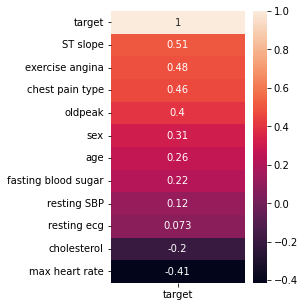

In [32]:
corr = heart_3.corr()

plt.figure(figsize = (3, 5))
sns.heatmap(corr[['target']].sort_values(by = 'target',ascending = False),
            annot = True)

plt.savefig('./imgs/small_corr.png',dpi=300, bbox_inches = "tight")
plt.show()

In [33]:
# Lets choose specific columns first
numeric_features_2 = heart_3.drop('target', axis = 1).columns

poly_2 = PolynomialFeatures(include_bias=False)
df_2 = poly_2.fit_transform(heart_3[numeric_features_2])

# make it into a dateframe 
poly_df_2 = pd.DataFrame(data = df_2, columns = poly_2.get_feature_names(numeric_features_2))
poly_df_2.head()

,age,sex,chest pain type,resting SBP,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,max heart rate^2,max heart rate exercise angina,max heart rate oldpeak,max heart rate ST slope,exercise angina^2,exercise angina oldpeak,exercise angina ST slope,oldpeak^2,oldpeak ST slope,ST slope^2
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,...,29584.0,0.0,0.0,172.0,0.0,0.0,0.0,0.00,0.0,1.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,...,24336.0,0.0,156.0,312.0,0.0,0.0,0.0,1.00,2.0,4.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,...,9604.0,0.0,0.0,98.0,0.0,0.0,0.0,0.00,0.0,1.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,...,11664.0,108.0,162.0,216.0,1.0,1.5,2.0,2.25,3.0,4.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,...,14884.0,0.0,0.0,122.0,0.0,0.0,0.0,0.00,0.0,1.0


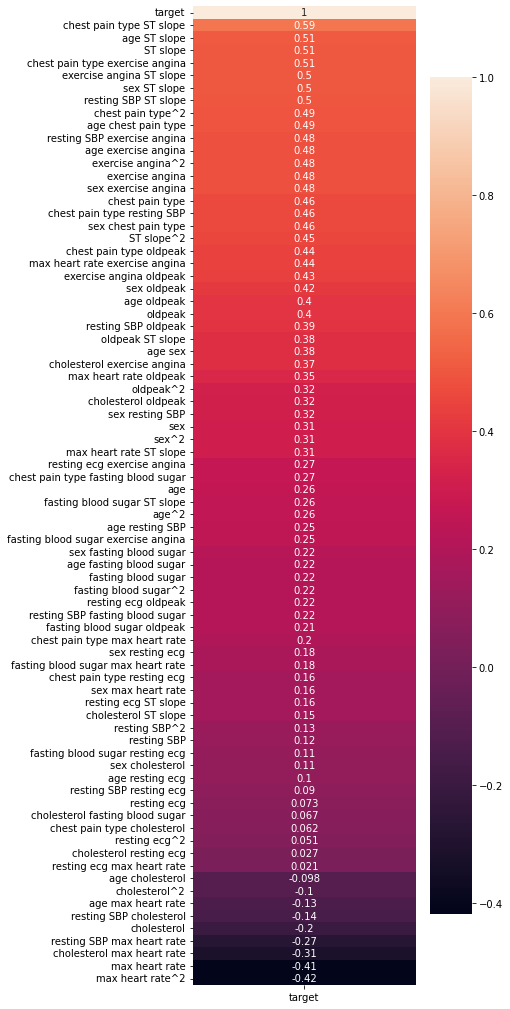

In [34]:
# adding in the target variable to get a corralation
poly_df_2['target'] = y
corr = poly_df_2.corr()

plt.figure(figsize = (5, 18))
sns.heatmap(corr[['target']].sort_values(by = 'target',ascending = False),
            annot = True)

plt.show()

In [35]:
X_poly_2 = poly_df_2.drop('target', axis =1)
base_df = base_scores(X_poly_2, y, "TB Poly idea")

base_df

,Notes,Log_train,Log_test,Bag_train,Bag_test,Ada_boost_train,Ada_boost_test,Grad_train,Grad_test,RF_train,RF_test,SVC_train,SVC_test,KNN_train,KNN_test
0,Bassa's data,0.847539,0.837535,0.996399,0.910364,0.967587,0.890756,0.954382,0.904762,1.0,0.915966,0.901561,0.871148,0.899160,0.862745
1,Heart Numeric Only,0.805522,0.817927,0.986795,0.817927,0.915966,0.837535,0.913565,0.831933,1.0,0.873950,0.852341,0.831933,0.843938,0.817927
2,Heart w/ dummy,0.860744,0.840336,0.992797,0.901961,0.953181,0.871148,0.955582,0.893557,1.0,0.907563,0.908764,0.868347,0.884754,0.854342
3,Poly numeric only,0.818727,0.826331,0.992797,0.848739,0.961585,0.851541,0.948379,0.820728,1.0,0.868347,0.842737,0.823529,0.836735,0.815126
4,Poly with dummy,0.863145,0.848739,0.992797,0.887955,0.979592,0.899160,0.977191,0.901961,1.0,0.913165,0.897959,0.871148,0.895558,0.834734
0,TB Poly idea,0.870348,0.865546,0.995198,0.893557,0.992797,0.907563,0.979592,0.910364,1.0,0.918768,0.896759,0.873950,0.883553,0.843137


In [36]:
base_df.reset_index(inplace=True)
base_df.drop('index', axis = 1, inplace = True)
base_df

,Notes,Log_train,Log_test,Bag_train,Bag_test,Ada_boost_train,Ada_boost_test,Grad_train,Grad_test,RF_train,RF_test,SVC_train,SVC_test,KNN_train,KNN_test
0,Bassa's data,0.847539,0.837535,0.996399,0.910364,0.967587,0.890756,0.954382,0.904762,1.0,0.915966,0.901561,0.871148,0.899160,0.862745
1,Heart Numeric Only,0.805522,0.817927,0.986795,0.817927,0.915966,0.837535,0.913565,0.831933,1.0,0.873950,0.852341,0.831933,0.843938,0.817927
2,Heart w/ dummy,0.860744,0.840336,0.992797,0.901961,0.953181,0.871148,0.955582,0.893557,1.0,0.907563,0.908764,0.868347,0.884754,0.854342
3,Poly numeric only,0.818727,0.826331,0.992797,0.848739,0.961585,0.851541,0.948379,0.820728,1.0,0.868347,0.842737,0.823529,0.836735,0.815126
4,Poly with dummy,0.863145,0.848739,0.992797,0.887955,0.979592,0.899160,0.977191,0.901961,1.0,0.913165,0.897959,0.871148,0.895558,0.834734
5,TB Poly idea,0.870348,0.865546,0.995198,0.893557,0.992797,0.907563,0.979592,0.910364,1.0,0.918768,0.896759,0.873950,0.883553,0.843137


In [37]:
sum(base_df.loc[0,['Log_test','Bag_test','Ada_boost_test',
                            'Grad_test','RF_test','SVC_test', 'KNN_test']] < base_df.loc[5,['Log_test','Bag_test','Ada_boost_test','Grad_test','RF_test','SVC_test', 'KNN_test']])

5

> Combing Bassa and my idea, we managed to get a model that did better in 5/7 tests, so this will be the dataset we will work from

<span id = 'tb_clean'></span>
## Getting rid of some columns from TB_poly

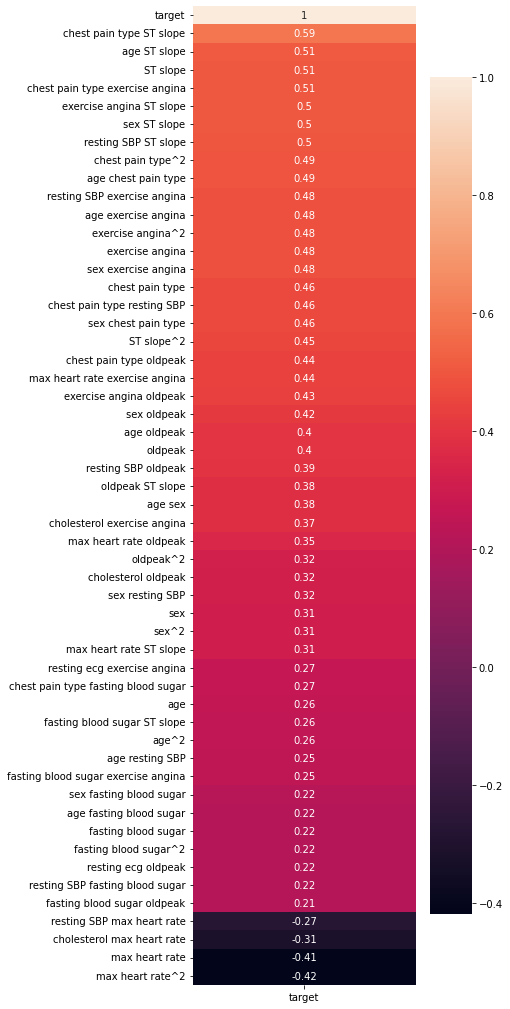

In [38]:
# adding in the target variable to get a corralation
corr = poly_df_2.corr()[['target']]
corr = corr.loc[(corr['target'] > .2) | (corr['target'] < -0.2)]

plt.figure(figsize = (5, 18))
sns.heatmap(corr[['target']].sort_values(by = 'target',ascending = False),
            annot = True)
plt.show()

In [39]:
poly_3 = poly_df_2[list(corr.index)]
X_poly_3 = poly_3.drop('target', axis = 1)

In [40]:
base_df = base_scores(X_poly_3, y, "Got rid of low corr")
base_df.reset_index(inplace=True)
base_df.drop('index', axis = 1, inplace = True)
base_df

,Notes,Log_train,Log_test,Bag_train,Bag_test,Ada_boost_train,Ada_boost_test,Grad_train,Grad_test,RF_train,RF_test,SVC_train,SVC_test,KNN_train,KNN_test
0,Bassa's data,0.847539,0.837535,0.996399,0.910364,0.967587,0.890756,0.954382,0.904762,1.0,0.915966,0.901561,0.871148,0.899160,0.862745
1,Heart Numeric Only,0.805522,0.817927,0.986795,0.817927,0.915966,0.837535,0.913565,0.831933,1.0,0.873950,0.852341,0.831933,0.843938,0.817927
2,Heart w/ dummy,0.860744,0.840336,0.992797,0.901961,0.953181,0.871148,0.955582,0.893557,1.0,0.907563,0.908764,0.868347,0.884754,0.854342
3,Poly numeric only,0.818727,0.826331,0.992797,0.848739,0.961585,0.851541,0.948379,0.820728,1.0,0.868347,0.842737,0.823529,0.836735,0.815126
4,Poly with dummy,0.863145,0.848739,0.992797,0.887955,0.979592,0.899160,0.977191,0.901961,1.0,0.913165,0.897959,0.871148,0.895558,0.834734
5,TB Poly idea,0.870348,0.865546,0.995198,0.893557,0.992797,0.907563,0.979592,0.910364,1.0,0.918768,0.896759,0.873950,0.883553,0.843137
6,Got rid of low corr,0.857143,0.868347,0.992797,0.899160,0.980792,0.910364,0.978391,0.904762,1.0,0.913165,0.876351,0.868347,0.890756,0.840336


In [41]:
sum(base_df.loc[6,['Log_test','Bag_test','Ada_boost_test',
                            'Grad_test','RF_test','SVC_test', 'KNN_test']] > base_df.loc[5,['Log_test','Bag_test','Ada_boost_test','Grad_test','RF_test','SVC_test', 'KNN_test']])

3

> By getting rid of some 20-
ish rows, the new dataframe is now tied with the full tb_poly. 3 wins and 1 tie

## Visual Representation of accuracy of the top 2 datasets

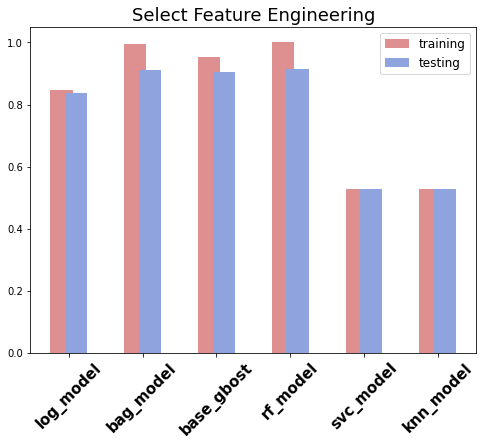

In [42]:
keys = [key for key in graph_scores(X_bassa, y).keys()]
values = [value for value in graph_scores(X_bassa, y).values()]
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(np.arange(len(keys)) - 0.1, [value[0] for value in values],
       width=0.3, color='#DE8F8F', align='center', label = "training")
ax.bar(np.arange(len(keys)) + 0.1,
       [value[1] if len(value) == 2 else 0 for value in values],
       width=0.3, color='#8FA3DE', align='center',  label = "testing")
ax.set_xticks(np.arange(len(keys)))
ax.set_xticklabels(keys, rotation=45,  fontsize = 15,
                   fontweight = "bold")
plt.legend(fontsize = 12)
plt.title('Select Feature Engineering', size = 18)
plt.savefig('./imgs/sfe_models.png',dpi=300, bbox_inches = "tight")

plt.show()

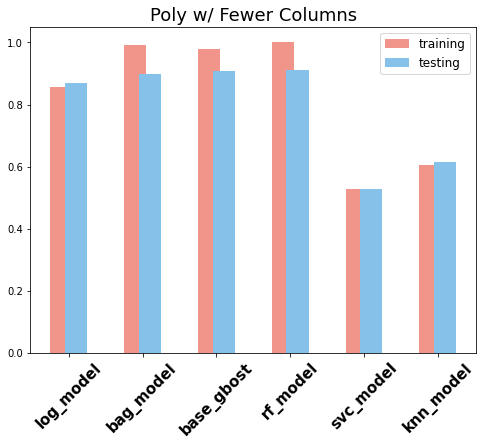

In [43]:
keys = [key for key in graph_scores(X_poly_3, y).keys()]
values = [value for value in graph_scores(X_poly_3, y).values()]
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(np.arange(len(keys)) - 0.1, [value[0] for value in values],
       width=0.3, color='#F1948A', align='center', label = "training")
ax.bar(np.arange(len(keys)) + 0.1,
       [value[1] if len(value) == 2 else 0 for value in values],
       width=0.3, color='#85C1E9', align='center',  label = "testing")
ax.set_xticks(np.arange(len(keys)))
ax.set_xticklabels(keys, rotation=45,  fontsize = 15,
                   fontweight = "bold")
plt.legend(fontsize = 12)
plt.title('Poly w/ Fewer Columns', size = 18)
plt.savefig('./imgs/pwfc_models.png',dpi=300, bbox_inches = "tight")
plt.show()

<span id = 'gridsearches'></span>
## Time to start looking at some GridSearches
> using the poly_3 because it has fewer columns and did well on some tests, and will hopefully let the models run a bit faster

### Basic Function to print out the Recall, Precision, and Accuracy

In [44]:
## this will just be a function to return the recall, precision, accuracy
def arp(model, X, y,):
    preds = model.predict(X)
    
    scores = {}
    scores['Recall']  = metrics.recall_score(y, preds)
    scores['Precision'] = metrics.precision_score(y, preds)
    scores['Accuracy'] = metrics.accuracy_score(y, preds)
    return scores

### Function to Return the scores and added metrics from above in a dataframe

In [45]:
grid_df = pd.DataFrame()

def add_2_grid(model, X, y, note):
    # instantiate a list and dictionary
    info_list = []
    d = {}
    
    # run function from above to get the results
    results = arp(model, X, y)
    
    # add to the dictionary
    d['Notes'] = note
    d['Recall'] = results['Recall']
    d['Precision'] = results['Precision']
    d['Accuracy'] = results['Accuracy']

    # appending all this information to a list to add to the dataframe base_df
    info_list.append(d)
    return grid_df.append(info_list)

### First we need to train test split our data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_3, y, stratify = y, test_size=0.30, random_state=22)

### Getting the Baseline

In [47]:
y_test.value_counts(normalize=True)

1    0.529412
0    0.470588
Name: target, dtype: float64

## logisitic regression<span id ='hlog'>

In [48]:
# Make a pipe so we can scale our data
lr_pipe = Pipeline([('sc', StandardScaler()),
                   ('lr', LogisticRegression())])

lr_params = {'lr__penalty': ['l1', 'l2'],
             'lr__tol': [0.1, 0.01, 0.001],
             'lr__C': [2, 1, 0.5],
             'lr__solver': ['saga'],
             'lr__max_iter': [5000]}

lr_gs = GridSearchCV(lr_pipe, 
                     lr_params,
                     cv = 3,
                     verbose = 1)

lr_gs.fit(X_train, y_train)
print(lr_gs.best_params_)
print(lr_gs.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'lr__C': 0.5, 'lr__max_iter': 5000, 'lr__penalty': 'l1', 'lr__solver': 'saga', 'lr__tol': 0.001}
0.83674865162022


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    2.2s finished


In [49]:
print('Training:', lr_gs.score(X_train, y_train))
print('Test:', lr_gs.score(X_test, y_test))

Training: 0.858343337334934
Test: 0.8683473389355743


> For logistic, it seems as though the default parameters are the best, with a test score of 86.83%

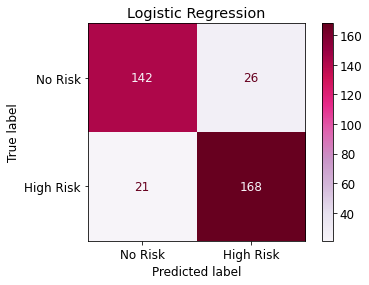

In [50]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(lr_gs, X_test, y_test, cmap = 'PuRd',  display_labels = ['No Risk','High Risk']);
plt.title('Logistic Regression');

In [51]:
grid_df = add_2_grid(lr_gs, X_test, y_test, 'Logistic Regression')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347


## Bagging Classifier

In [52]:
params = {
    'n_estimators' : [10, 50, 100],
    'bootstrap' : [True, False],
    'max_features' : [0.10, 0.25, ]}

bag_gs = GridSearchCV(BaggingClassifier(),
                      params,
                      cv = 5,
                      verbose = 1)

bag_gs.fit(X_train,y_train)
bag_gs.best_params_, bag_gs.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.0s finished


({'bootstrap': True, 'max_features': 0.25, 'n_estimators': 100},
 0.911160810908304)

In [53]:
print('Train:', bag_gs.score(X_train, y_train))
print('Test:', bag_gs.score(X_test, y_test))

Train: 1.0
Test: 0.9131652661064426


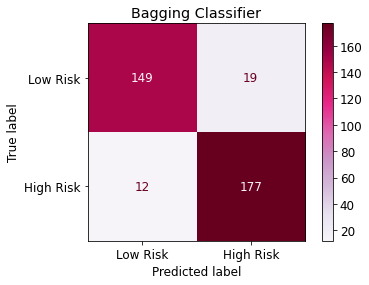

In [54]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(bag_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Bagging Classifier');

In [55]:
grid_df = add_2_grid(bag_gs, X_test, y_test, 'Bagging Classifier')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165


## Ada Boost <span id = 'ada'>

In [56]:
ada = AdaBoostClassifier()
params = {
    #'base_estimator__max_depth': [2, 3, 4, 5],
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [1, 0.5, 0.1]
}

ada_gs = GridSearchCV(ada,
                      params,
                      cv = 4)

ada_gs.fit(X_train,y_train)
ada_gs.best_params_, ada_gs.best_score_

({'learning_rate': 1, 'n_estimators': 100}, 0.8775591185130658)

In [57]:
print('Train:', ada_gs.score(X_train, y_train))
print('Test:', ada_gs.score(X_test, y_test))

Train: 0.9411764705882353
Test: 0.8851540616246498


> The ada_gs did some 3% worse than the base model ada @ 0.913165

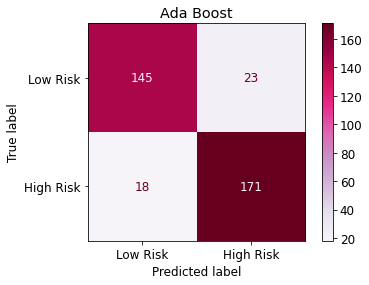

In [58]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(ada_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Ada Boost')
plt.show()

In [59]:
grid_df = add_2_grid(ada_gs, X_test, y_test, 'Ada Boost')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154


## Gradient Boosting <span id ='gb'>

In [60]:
params  = {'learning_rate':[1, 0.1,0.5],
          'n_estimators':[150, 200, 300],
          'max_depth':[2, 3, 4]}

gs_model = GridSearchCV(estimator =GradientBoostingClassifier(), 
                        param_grid = params,
                        n_jobs=4,
                        cv=3,
                        verbose = 1)
gs_model.fit(X_train,y_train)
gs_model.best_params_, gs_model.best_score_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  81 out of  81 | elapsed:   11.3s finished


({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150},
 0.8931555116917297)

In [61]:
print('Train:', gs_model.score(X_train, y_train))
print('Test:', gs_model.score(X_test, y_test))

Train: 0.9915966386554622
Test: 0.9131652661064426


> With gridsearch we see a 2.3% increase of **testing** score compared to the base model @ 0.904762

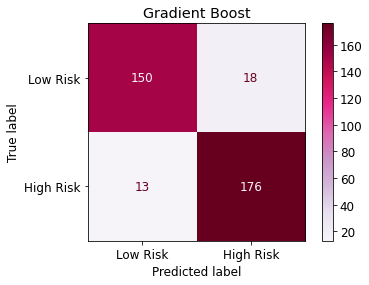

In [62]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(gs_model, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Gradient Boost');
plt.show()

In [63]:
grid_df = add_2_grid(gs_model, X_test, y_test, 'Gradient Boost 1')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165


## Random Forest <span id = 'rf'>

In [64]:
params = {
    'n_estimators' :[100, 200],
    'max_depth' : [50, None],
    'min_samples_split' : [2, 4],
    'min_samples_leaf' : [1, 3],
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=1663),
                     params,
                     cv = 5,
                     verbose=1)

rf_gs.fit(X_train,y_train)
rf_gs.best_params_, rf_gs.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   20.8s finished


({'max_depth': 50,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9063559627732488)

In [65]:
print('Train:', rf_gs.score(X_train, y_train))
print('Test:', rf_gs.score(X_test, y_test))

Train: 1.0
Test: 0.9159663865546218


> With the gridsearch, we seem to have gotten the same score as the base model @  0.915966, suggesting the default parameters were the best choice out of what we gave.

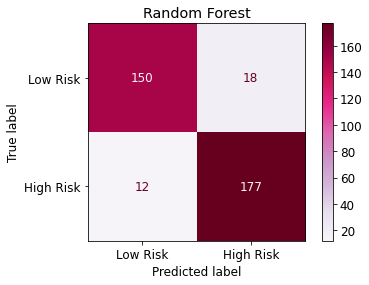

In [66]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(rf_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Random Forest');

In [67]:
grid_df = add_2_grid(rf_gs, X_test, y_test, 'Random Forest')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165
0,Random Forest,0.936508,0.907692,0.915966


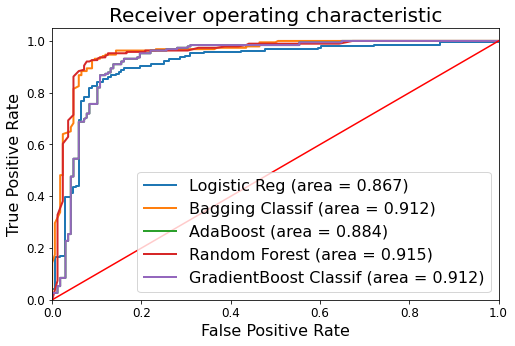

In [101]:
# ROC-AUC curve plot
# baseline model with default values
#Logistic regression from grid search
lg_roc_auc = roc_auc_score(y_test, lr_gs.predict(X_test))
fprlg, tprlg, thresholdsB = roc_curve(y_test, lr_gs.predict_proba(X_test)[:,1])
# bagging model one from grid search
bag_roc_auc = roc_auc_score(y_test, bag_gs.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, bag_gs.predict_proba(X_test)[:,1])
# adaboost model two from grid search
ada_roc_auc = roc_auc_score(y_test, ada_gs.predict(X_test))
fprf, tprf, thresholds_f = roc_curve(y_test, ada_gs.predict_proba(X_test)[:,1])

# Randomforest from grid search
rf_roc_auc = roc_auc_score(y_test, rf_gs.predict(X_test))
fprrf, tprrf, thresholds_rf = roc_curve(y_test, rf_gs.predict_proba(X_test)[:,1])


gra_roc_auc = roc_auc_score(y_test, gs_model.predict(X_test))
fprga, tprga, thresholds_ga = roc_curve(y_test, gs_model.predict_proba(X_test)[:,1])



plt.figure(figsize = (8, 5))
plt.plot(fprlg, tprlg, label='Logistic Reg (area = %0.3f)' % lg_roc_auc, linewidth = 2)
plt.plot(fpr1, tpr1, label='Bagging Classif (area = %0.3f)' % bag_roc_auc, linewidth =2)
plt.plot(fprf, tprf, label='AdaBoost (area = %0.3f)' % ada_roc_auc, linewidth = 2)
plt.plot(fprrf, tprrf, label='Random Forest (area = %0.3f)' % rf_roc_auc, linewidth =2)
plt.plot(fprf, tprf, label='GradientBoost Classif (area = %0.3f)' % gra_roc_auc, linewidth = 2)




plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver operating characteristic', fontsize = 20)
plt.legend(loc="lower right", fontsize = 16)
plt.savefig('Log_ROC')
plt.show()

## Decision Tree <span id ='dt'>

In [68]:
params = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 5, 11],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha': [1, 0.1, 0],
}

dt_gs = GridSearchCV(DecisionTreeClassifier(),
                     params,
                     cv = 5,
                     verbose = 1)

dt_gs.fit(X_train,y_train)
dt_gs.best_params_, dt_gs.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.8s finished


({'ccp_alpha': 0,
  'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8727725272346871)

In [69]:
dt_gs.best_params_, dt_gs.best_score_

({'ccp_alpha': 0,
  'criterion': 'entropy',
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8727725272346871)

In [70]:
print('Train:', dt_gs.score(X_train, y_train))
print('Test:', dt_gs.score(X_test, y_test))

Train: 1.0
Test: 0.8599439775910365


> Super overfit, but i guess thats expected from a decision tree. Guess we can just ignore this one as a model

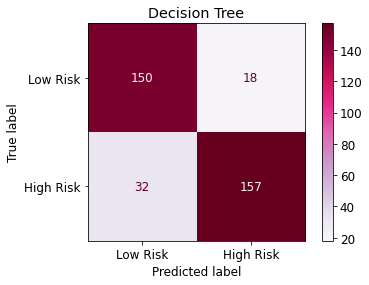

In [71]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(dt_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Decision Tree');

In [72]:
grid_df = add_2_grid(dt_gs, X_test, y_test, 'Decision Tree')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165
0,Random Forest,0.936508,0.907692,0.915966
0,Decision Tree,0.830688,0.897143,0.859944


## SVC <span id = 'svc'>

In [73]:
params = {
    'C' : [0.1, 1, 2],
    'kernel' : ['poly', 'rbf', 'sigmoid'],
    'degree' : [2, 3, 4],
}

svc_gs = GridSearchCV(SVC(),
                      params,
                      cv = 5,
                      verbose = 1)

svc_gs.fit(X_train, y_train)
svc_gs.best_params_, svc_gs.best_score_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    4.0s finished


({'C': 2, 'degree': 2, 'kernel': 'rbf'}, 0.7142774691580694)

In [74]:
print('Train:', svc_gs.score(X_train, y_train))
print('Test:', svc_gs.score(X_test, y_test))

Train: 0.723889555822329
Test: 0.7647058823529411


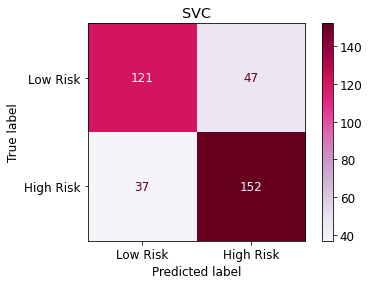

In [75]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(svc_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('SVC');

In [76]:
grid_df = add_2_grid(svc_gs, X_test, y_test, 'SVC')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165
0,Random Forest,0.936508,0.907692,0.915966
0,Decision Tree,0.830688,0.897143,0.859944
0,SVC,0.804233,0.763819,0.764706


## KNN <span id = 'hknn'>

In [77]:
params = {
    'n_neighbors' : np.arange(1, 20, 2),
    'leaf_size' : [10, 20, 30 , 40],
    'metric' : ['euclidean', 'minkowski','manhattan']
}

knn_gs = GridSearchCV(KNeighborsClassifier(),
                      params,
                      cv = 5,
                      verbose = 1)

knn_gs.fit(X_train, y_train)
knn_gs.best_params_, knn_gs.best_score_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    6.4s finished


({'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 1},
 0.7790924175744897)

In [78]:
print('Train:', knn_gs.score(X_train, y_train))
print('Test:', knn_gs.score(X_test, y_test))

Train: 1.0
Test: 0.8291316526610645


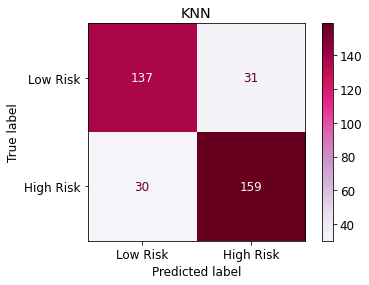

In [79]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(knn_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('KNN');

In [80]:
grid_df = add_2_grid(knn_gs, X_test, y_test, 'KNN')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165
0,Random Forest,0.936508,0.907692,0.915966
0,Decision Tree,0.830688,0.897143,0.859944
0,SVC,0.804233,0.763819,0.764706
0,KNN,0.841270,0.836842,0.829132


## BNB <span id ='hbnb'>

In [81]:
params = {
    'alpha' : [1, 0.5, 1.0e-10],
}

bnb_gs = GridSearchCV(BernoulliNB(),
                      params,
                      cv = 5,
                      verbose = 1)

bnb_gs.fit(X_train, y_train)
bnb_gs.best_params_, bnb_gs.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


({'alpha': 1}, 0.7455161965226175)

In [82]:
print('Train:', bnb_gs.score(X_train, y_train))
print('Test:', bnb_gs.score(X_test, y_test))

Train: 0.7454981992797118
Test: 0.742296918767507


> At least its consistent?

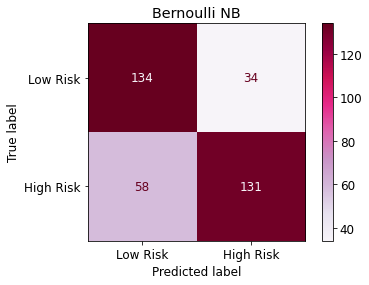

In [83]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(bnb_gs, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Bernoulli NB');

In [84]:
grid_df = add_2_grid(bnb_gs, X_test, y_test, 'Bernoulli Naive Bayes')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165
0,Random Forest,0.936508,0.907692,0.915966
0,Decision Tree,0.830688,0.897143,0.859944
0,SVC,0.804233,0.763819,0.764706
0,KNN,0.841270,0.836842,0.829132
0,Bernoulli Naive Bayes,0.693122,0.793939,0.742297


## Neural Network <span id = 'nn'>

In [85]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [86]:
Z_train.shape

(833, 53)

In [87]:
model = Sequential()

## Add input and hidden layer (first dense layer)
model.add(Dense(64,
               activation = 'relu',
               input_shape = Z_train[0].shape))
model.add(Dropout(0.05))

## Add 2nd & 3rd hidden layer
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.05))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.05))

## Output layer
model.add(Dense(1, activation = 'sigmoid'))

# adding in earlystopping
es = EarlyStopping(patience=5)

# Compile our data
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [88]:
results = model.fit(Z_train, y_train,
                    batch_size= 15,
                    epochs=10,
                    validation_data=(Z_test, y_test),
                    verbose = 1)

Epoch 1/10
56/56 [==============================] - 1s 3ms/step - loss: 0.4736 - accuracy: 0.7827 - val_loss: 0.3806 - val_accuracy: 0.8347
Epoch 2/10
56/56 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8307 - val_loss: 0.3708 - val_accuracy: 0.8431
Epoch 3/10
56/56 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8439 - val_loss: 0.3582 - val_accuracy: 0.8599
Epoch 4/10
56/56 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8511 - val_loss: 0.3536 - val_accuracy: 0.8543
Epoch 5/10
56/56 [==============================] - 0s 1ms/step - loss: 0.3117 - accuracy: 0.8571 - val_loss: 0.3429 - val_accuracy: 0.8739
Epoch 6/10
56/56 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8715 - val_loss: 0.3531 - val_accuracy: 0.8908
Epoch 7/10
56/56 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.8872 - val_loss: 0.3530 - val_accuracy: 0.8739
Epoch 8/10
56/56 [==

> I have tried multiple NN and can't get anything higher than an 89%

## Gradient Boosting Part 2 <span id = 'gd_boost2'>

In [89]:
params  = {'learning_rate':[0.15, 0.1],
           'n_estimators':[150, 250],
           'max_depth':[5, 6]}

gs_model_2 = GridSearchCV(GradientBoostingClassifier(min_samples_split=2), 
                        param_grid = params, scoring='accuracy', n_jobs=4,  cv=5,
                        verbose =1)
gs_model_2.fit(X_train,y_train)
print(gs_model_2.best_params_, gs_model_2.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   10.7s finished


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250} 0.9039968256258566


In [90]:
print('Train:', gs_model_2.score(X_train, y_train))
print('Test:', gs_model_2.score(X_test, y_test))

Train: 1.0
Test: 0.9187675070028011


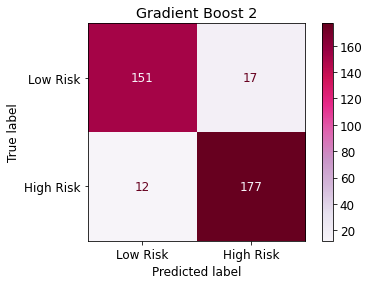

In [91]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(gs_model_2, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Gradient Boost 2');

In [92]:
grid_df = add_2_grid(gs_model_2, X_test, y_test, 'Gradient Boost 2')
grid_df

,Notes,Recall,Precision,Accuracy
0,Logistic Regression,0.888889,0.865979,0.868347
0,Bagging Classifier,0.936508,0.903061,0.913165
0,Ada Boost,0.904762,0.881443,0.885154
0,Gradient Boost 1,0.931217,0.907216,0.913165
0,Random Forest,0.936508,0.907692,0.915966
0,Decision Tree,0.830688,0.897143,0.859944
0,SVC,0.804233,0.763819,0.764706
0,KNN,0.841270,0.836842,0.829132
0,Bernoulli Naive Bayes,0.693122,0.793939,0.742297
0,Gradient Boost 2,0.936508,0.912371,0.918768


## Plotting 10 most important features From Gradient Boost updated

Accuracy of GBC on testing data: 0.9188
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       168
           1       0.91      0.94      0.92       189

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



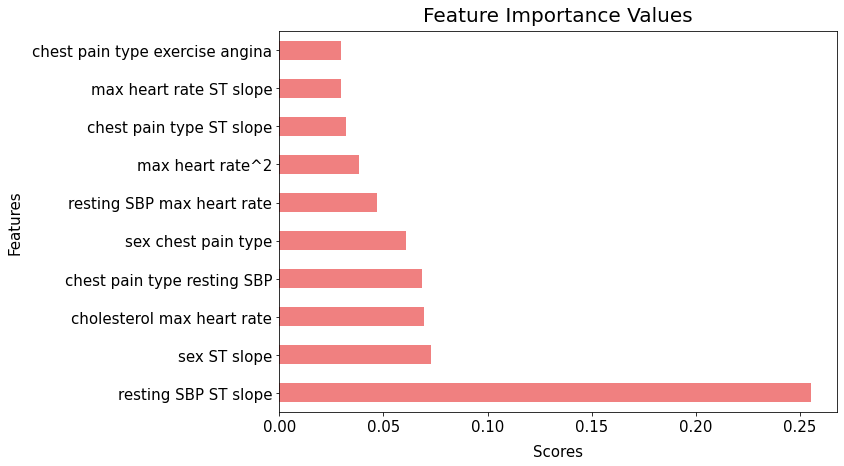

In [104]:
model1 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=250,
                                    max_depth=5, min_samples_split=2)
model1.fit(X_train,y_train)
predictors=list(X_train)
plt.figure(figsize = (10, 7))
imp_features = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
imp_features[:10].plot(kind='barh', title='Importance of Features', color = 'lightcoral')
plt.title('Feature Importance Values', fontsize = 20, pad  = 10)
plt.ylabel('Features', fontsize = 15, labelpad = 10)
plt.yticks(size = 15)
plt.xlabel('Scores', fontsize = 15, labelpad = 10)
plt.xticks(size = 15)
print('Accuracy of GBC on testing data: {:.4f}'.format(model1.score(X_test, y_test)))
y_pred=model1.predict(X_test)
print(classification_report(y_test, y_pred))

plt.savefig('./imgs/imp_of_features.png',dpi=300, bbox_inches = "tight")

## Voting Classifier <span id = 'voting'>

In [94]:
# need to scale it for the certain models
svc_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC())
])

knn_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

log_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('log', LogisticRegression(max_iter=1000))
])

# making the voting classifier model
vote = VotingClassifier([
    ('ada', AdaBoostClassifier()),
    ('gb', model1),
    ('bag', BaggingClassifier()),
    ('svc', svc_pipe),
    ('log', log_pipe),
    ('rf', RandomForestClassifier(max_depth = 50, n_estimators = 200)),
    ('knn_pipe', knn_pipe)])
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         max_depth=4,
                                                         n_estimators=200)),
                             ('bag', BaggingClassifier()),
                             ('svc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('svc', SVC())])),
                             ('log',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('log',
                                               LogisticRegression(max_iter=1000))])),
                             ('rf',
                              RandomForestClassifier(max_depth=50,
                                                     n_estimators=200)),
                       

In [95]:
print(vote.score(X_train, y_train))
print(vote.score(X_test, y_test))

0.9483793517406963
0.8991596638655462


**Model Scores**  
Overall, the best model we had for *accuracy* was the Gradient boosting at a 0.9244, followed by the Random Forest Model, which had 0.91036

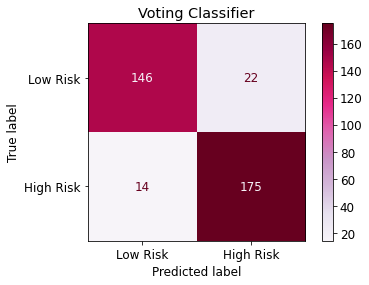

In [102]:
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(vote, X_test, y_test, cmap = 'PuRd', display_labels = ['Low Risk','High Risk']);
plt.title('Voting Classifier');

In [ ]:
grid_df = add_2_grid(vote, X_test, y_test, 'Voting Classifier')
grid_df

<span id ='gridsearch_scores'></span>
## Data Frame of all our GrideSearch scores, with Recall, Precision, Accuracy

In [ ]:
grid_df.reset_index(inplace=True)
grid_df.drop('index', axis = 1, inplace = True)

grid_df

<span id = 'hanalysis'></span>
# Analysis of Data using Gradient Boost 3 model

In [ ]:
for i in range(10):
    print(f'{imp_features.index[i]}: {round(imp_features[i],5)}')
    print('---'*13)

<span id = 'hcnr'></span>
### Conclusions and Recommendations
  For our Gradient descent model, the most important predictor was `resting SBP * ST slope` (Resting bp is resting systolic blood pressure & ST slope is a measurement of how well one's heart handles exercise). This feature alone made up almost 30% of our models' predictive ability.  In other words, the most prominent predictive factor for heart disease, according to our model, is whether an individual has a high resting systolic blood pressure along with how well their heart can handle exercise.  The next three most important features for our model were `sex * ST slope` which accounted for 7.1% for our model's prediction, followed by `sex * chest pain type`, which accounted for 6.75% of our model's predictive ability, and `chest pain type * resting SBP` which accounted for 6.41% of our model's predictive ability.

  By identifying these key predictors that are most predictive of CVD in patients (in high-income countries), medical professionals will be able to more quickly and accurately identify patients most likely to have CVD.  Not only will this improve the speed at which individuals are initiated on treatment (and hence improve their health outcomes), but it will free up doctors' time to treat other patients needing treatment -- ultimately benefiting the total patient population.

---

<span id='jen'></span>
# Jen's CHD work

**Data Dictionary**

|    | Column Name              | Description                                                                                                                                                                                                                                       | Type    |
|---:|:-------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------|
|  | state_abbr               | State abbreviation                                                                                                                                                                                                                                | Object  |
|  | state                    | State name                                                                                                                                                                                                                                        | Object  |
|  | county                   | County name                                                                                                                                                                                                                                       | Object  |
|  | county_fips              | County fips code                                                                                                                                                                                                                                  | Integer |
|  | tract_fips               | Census tract fips code                                                                                                                                                                                                                            | Integer |
|  | total_pop                | Total Population of Census 2010                                                                                                                                                                                                                   | Integer |
|  | access_to_healthcare     | Model-based estimate for crude prevalence of current lack of health insurance among adults aged 18-64 years, 2018                                                                                                                                 | Float   |
|  | arthritis                | Model-based estimate for crude prevalence of arthritis among adults aged >=18 years, 2018                                                                                                                                                         | Float   |
|  | binge_drinking           | Model-based estimate for crude prevalence of binge drinking among adults aged >=18 years, 2018                                                                                                                                                    | Float   |
|  | high_bp                  | Model-based estimate for crude prevalence of high blood pressure among adults aged >=18 years, 2017                                                                                                                                               | Float   |
|  | meds_for_high_bp         | Model-based estimate for crude prevalence of taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure, 2017                                                                                          | Float   |
|  | cancer                   | Model-based estimate for crude prevalence of cancer (excluding skin cancer) among adults aged >=18 years, 2018                                                                                                                                    | Float   |
|  | current_asthma           | Model-based estimate for crude prevalence of current asthma among adults aged >=18 years, 2018                                                                                                                                                    | Float   |
|  | cervical_screening       | Model-based estimate for crude prevalence of cervical cancer screening among adult women aged 21–65 years, 2018                                                                                                                                   | Float   |
|  | chd                      | Model-based estimate for crude prevalence of coronary heart disease among adults aged >=18 years, 2018                                                                                                                                            | Float   |
|  | doc_checkups             | Model-based estimate for crude prevalence of visits to doctor for routine checkup within the past year among adults aged >=18 years, 2018                                                                                                         | Float   |
|  | chol_screen              | Model-based estimate for crude prevalence of cholesterol screening among adults aged >=18 years, 2017                                                                                                                                             | Float   |
|  | colon_screen             | Model-based estimate for crude prevalence of fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 years, 2018                                                                                                           | Float   |
|  | copd                     | Model-based estimate for crude prevalence of chronic obstructive pulmonary disease among adults aged >=18 years, 2018                                                                                                                             | Float   |
|  | core_preventative_men    | Model-based estimate for crude prevalence of older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, 2018                               | Float   |
|  | core_preventative_female | Model-based estimate for crude prevalence of older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years, 2018 | Float   |
|  | current_smoker           | Model-based estimate for crude prevalence of current smoking among adults aged >=18 years, 2018                                                                                                                                                   | Float   |
|  | dental_visits            | Model-based estimate for crude prevalence of visits to dentist or dental clinic among adults aged >=18 years, 2018                                                                                                                                | Float   |
|  | diabetes                 | Model-based estimate for crude prevalence of diagnosed diabetes among adults aged >=18 years, 2018                                                                                                                                                | Float   |
|  | high_chol                | Model-based estimate for crude prevalence of high cholesterol among adults aged >=18 years who have been screened in the past 5 years, 2017                                                                                                       | Float   |
|  | kidney_disease           | Model-based estimate for crude prevalence of chronic kidney disease among adults aged >=18 years, 2018                                                                                                                                            | Float   |
|  | physical_activity        | Model-based estimate for crude prevalence of no leisure-time physical activity among adults aged >=18 years, 2018                                                                                                                                 | Float   |
|  | mammography              | Model-based estimate for crude prevalence of mammography use among women aged 50–74 years, 2018                                                                                                                                                   | Float   |
|  | mental_health            | Model-based estimate for crude prevalence of mental health not good for >=14 days among adults aged >=18 years, 2018                                                                                                                              | Float   |
|  | obesity                  | Model-based estimate for crude prevalence of obesity among adults aged >=18 years, 2018                                                                                                                                                           | Float   |
|  | poor_physical_health     | Model-based estimate for crude prevalence of physical health not good for >=14 days among adults aged >=18 years, 2018                                                                                                                            | Float   |
|  | poor_sleep               | Model-based estimate for crude prevalence of sleeping less than 7 hours among adults aged >=18 years, 2018                                                                                                                                        | Float   |
|  | stroke                   | Model-based estimate for crude prevalence of stroke among adults aged >=18 years, 2018                                                                                                                                                            | Float   |
|  | teeth_lost               | Model-based estimate for crude prevalence of all teeth lost among adults aged >=65 years, 2018                                                                                                                                                    | Float   |

## Cleaning and EDA <span id='jclean'>

In [ ]:
df = pd.read_csv('./data/PLACES__Census_Tract_Data__GIS_Friendly_Format___2020_release.csv')
df.head()

In [ ]:
df.shape

In [109]:
df.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [110]:
df.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [111]:
# Dropped all null values since it's a small amount of the data
df.dropna(axis = 0, how = 'any', inplace = True)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

### Renaming Columns 

In [ ]:
df_dict = {
    'StateAbbr': 'state_abbr', 
    'StateDesc': 'state',
    'CountyName':'county',
    'CountyFIPS':'county_fips',
    'TractFIPS': 'tract_fips',
    'TotalPopulation':'total_pop',
    'ACCESS2_CrudePrev':'access_to_healthcare',
    'ARTHRITIS_CrudePrev':'arthritis',
    'BINGE_CrudePrev':'binge_drinking',
    'BPHIGH_CrudePrev':'high_bp',
    'BPMED_CrudePrev':'meds_for_high_bp',
    'CANCER_CrudePrev':'cancer',
    'CASTHMA_CrudePrev':'current_asthma',
    'CERVICAL_CrudePrev':'cervical_screening',
    'CHD_CrudePrev':'chd',
    'CHECKUP_CrudePrev':'doc_checkups',
    'CHOLSCREEN_CrudePrev':'chol_screen',
    'COLON_SCREEN_CrudePrev':'colon_screen',
    'COPD_CrudePrev':'copd',
    'COREM_CrudePrev':'core_preventative_men',
    'COREW_CrudePrev':'core_preventative_female',
    'CSMOKING_CrudePrev':'current_smoker',
    'DENTAL_CrudePrev':'dental_visits',
    'DIABETES_CrudePrev':'diabetes',
    'HIGHCHOL_CrudePrev':'high_chol',
    'KIDNEY_CrudePrev':'kidney_disease',
    'LPA_CrudePrev':'physical_activity',
    'MAMMOUSE_CrudePrev':'mammography',
    'MHLTH_CrudePrev':'mental_health',
    'OBESITY_CrudePrev':'obesity',
    'PHLTH_CrudePrev':'poor_physical_health',
    'SLEEP_CrudePrev':'poor_sleep',
    'STROKE_CrudePrev':'stroke',
    'TEETHLOST_CrudePrev':'teeth_lost'
}

df.rename(columns = df_dict, inplace = True)

In [ ]:
df.hist(figsize = (20,15), grid = False);
plt.tight_layout();

### Dummy column for states

In [ ]:
dummy = pd.get_dummies(df, columns = ['state_abbr'])
dummy.drop(columns = ['state_abbr_DC'], inplace = True) # DC has the lowest chd risk rate - dropping

df = pd.merge(df,dummy)

df.drop(columns = ['state_abbr'], inplace = True)

## Regression EDA <span id ='reg_eda'>

In [ ]:
corr = df.corr()[['chd']]
corr = corr.loc[(corr['chd'] > .3) | (corr['chd'] < -0.29)]

# Heatmap
plt.figure(figsize = (8,10))
sns.heatmap(data = corr.sort_values(by = 'chd', ascending = False),
           annot = True,
           linewidths=0.1,
           cmap = 'flare_r',
           vmin=-0.5, 
           vmax=1);

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'copd', y= 'chd', data= df, color = 'salmon', line_kws = {'color': 'red'})
plt.title('Coronary Heart Disease & Chronic Obstructive Pulmonary Disease Crude Prevalence', size = 15, pad = 10),
plt.xlabel(xlabel = 'COPD', size = 15)
plt.ylabel(ylabel = 'CHD', size = 15);

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'kidney_disease', y= 'chd', data= df, color = 'salmon', line_kws = {'color': 'red'})
plt.title('Coronary Heart Disease & Kidney Disease Crude Prevalence', size = 15, pad = 10),
plt.xlabel(xlabel = 'Kidney', size = 15)
plt.ylabel(ylabel = 'CHD', size = 15);

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'binge_drinking', y= 'chd', data= df, color = 'salmon', line_kws = {'color': 'red'})
plt.title('Coronary Heart Disease & Binge Drinking Crude Prevalence', size = 15, pad = 10),
plt.xlabel(xlabel = 'Binge Drinking', size = 15)
plt.ylabel(ylabel = 'CHD', size = 15);

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'dental_visits', y= 'chd', data= df, color = 'salmon', line_kws = {'color': 'red'})
plt.title('Coronary Heart Disease & Dental Visits Crude Prevalence', size = 15, pad = 10),
plt.xlabel(xlabel = 'Dental Visits', size = 15)
plt.ylabel(ylabel = 'CHD', size = 15);

The top two positively correlated values with crude prevalence of coronary heart disease are crude prevalanence of chronic obstructive pulmonary disease (0.91) and crude prevalence of kidney disease (0.89). As crude prevalene of chronic obstructive pulmonary disease and/or kidney disease increase, crude prevalence of of coronary heart disease increases. <br>

The top two negatively correlated values with crude prevalence of coronary heart disease are crude prevalence of binge drinking (-0.63) and crude prevalence of visits to the dentist or dental clinic (-0.5). As crude prevalene of bringe drinking and/or visis to the dentist or dental clinic increase, crude prevalence of of coronary heart disease decreases.

# Regression Modeling <span id = 'reg_mod'>

In [ ]:
# Copying df for regression modeling
reg = df

In [ ]:
X = reg._get_numeric_data().drop(columns = 'chd')
y = reg['chd']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 321)

### Baseline

In [ ]:
y_train_baseline = [y_train.mean()]*len(y_train)
y_test_baseline = [y_train.mean()]*len(y_test)

print(f'Baseline Train RMSE: {metrics.mean_squared_error(y_train,y_train_baseline) ** 0.5}')
print(f'Baseline Test RMSE: {metrics.mean_squared_error(y_test, y_test_baseline) ** 0.5}')

### Linear Regression

In [ ]:
# Checking cross_val_score mean
cross_val_score(LinearRegression(),X_train,y_train, cv = 20, scoring = 'r2').mean()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Linear Reg Train R2: {lr.score(X_train, y_train)}')
print(f'Linear Reg Test R2: {lr.score(X_test, y_test)}')

In [ ]:
# Setting Predictions
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

print(f'Linear Reg Train RMSE: {metrics.mean_squared_error(y_train, train_preds, squared=False)}')
print(f'Linear Reg Test RMSE: {metrics.mean_squared_error(y_test, test_preds, squared=False)}')

### Regression Plot

In [ ]:
# Regression plot 
plt.figure(figsize = (10,8))
sns.regplot(x = test_preds, y = y_test, ci=None, 
            color = 'salmon',
            scatter_kws = {'s': 25}, 
            line_kws = {'color': 'red'})
plt.xlabel('Target Predictions', size = 15, fontweight = 'bold')
plt.xticks(size = 15)
plt.ylabel('Target Values', size = 15, fontweight = 'bold')
plt.yticks(size = 15)
plt.title('Target Predictions vs Target Values', size = 15, pad = 15, fontweight = 'bold');

## Ridge <span id ='ridge'>

In [ ]:
# Scale
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [ ]:
ridge_cv = RidgeCV(alphas = np.logspace(0,50,100), scoring = 'r2', cv = 5)
ridge_cv.fit(Z_train, y_train)

print(f'Ridge Train R2: {ridge_cv.score(Z_train, y_train)}')
print(f'Ridge Test R2: {ridge_cv.score(Z_test, y_test)}')

In [ ]:
# Getting predictions for the RMSE
ridge_train_preds = ridge_cv.predict(Z_train)
ridge_test_preds = ridge_cv.predict(Z_test)

print(f'Ridge Train RMSE: {metrics.mean_squared_error(y_train, ridge_train_preds, squared = False)}')
print(f'Ridge Test RMSE: {metrics.mean_squared_error(y_test, ridge_test_preds, squared = False)}')

### Ridge Plot

In [ ]:
# Ridge plot 
plt.figure(figsize = (10,8))
sns.regplot(x = ridge_test_preds, y = y_test, ci=None, 
            color = 'salmon',
            scatter_kws = {'s': 25}, 
            line_kws = {'color': 'red'})
plt.xlabel('Target Predictions', size = 15, fontweight = 'bold')
plt.xticks(size = 15)
plt.ylabel('Target Values', size = 15, fontweight = 'bold')
plt.yticks(size = 15)
plt.title('Ridge Target Predictions vs Target Values', size = 15, pad = 15, fontweight = 'bold');

## Lasso <span id = 'lasso'>

In [ ]:
lasso = LassoCV(cv = 5)
lasso.fit(Z_train, y_train)

print(f'Lasso Train R2: {lasso.score(Z_train, y_train)}')
print(f'Lasso Test R2: {lasso.score(Z_test, y_test)}')

In [ ]:
lasso_train_preds = lasso.predict(Z_train)
lasso_test_preds = lasso.predict(Z_test)

print(f'Lasso Train RMSE: {metrics.mean_squared_error(y_train, lasso_train_preds, squared = False)}')
print(f'Lasso Test RMSE: {metrics.mean_squared_error(y_test, lasso_test_preds, squared = False)}')

### Lasso Plot

In [ ]:
# Lasso plot 
plt.figure(figsize = (10,8))
sns.regplot(x = lasso_test_preds, y = y_test, ci=None, 
            color = 'salmon',
            scatter_kws = {'s': 25}, 
            line_kws = {'color': 'red'})
plt.xlabel('Target Predictions', size = 15, fontweight = 'bold')
plt.xticks(size = 15)
plt.ylabel('Target Values', size = 15, fontweight = 'bold')
plt.yticks(size = 15)
plt.title('Lasso Target Predictions vs Target Values', size = 15, pad = 15, fontweight = 'bold');

## Regression Results <span id ='reg_results'>

In [ ]:
reg_dict = {}

reg_dict['Model'] = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
reg_dict['Train R2'] = [lr.score(X_train, y_train), ridge_cv.score(Z_train, y_train), lasso.score(Z_train, y_train)]
reg_dict['Test R2'] = [lr.score(X_test, y_test), ridge_cv.score(Z_test, y_test), lasso.score(Z_test, y_test)]
reg_dict['Train RMSE'] = [metrics.mean_squared_error(y_train, train_preds, squared = False), metrics.mean_squared_error(y_train, ridge_train_preds, squared = False), metrics.mean_squared_error(y_train, lasso_train_preds, squared = False)]
reg_dict['Test RMSE'] = [metrics.mean_squared_error(y_test, test_preds, squared = False), metrics.mean_squared_error(y_test, ridge_test_preds, squared = False), metrics.mean_squared_error(y_test, lasso_test_preds, squared = False)]

reg_df = pd.DataFrame.from_dict(reg_dict, orient = 'columns')

reg_df

Our Linear Regression model is performing the best out of these three models with a Train R-squared score of .9914 and Test R-squared score of 0.9910. This is over 99% that our baseline model with no predictors. 

The Linear Regression model has the lowest RMSE scores, with a Train RMSE of 0.2036 and Test RMSE of 0.2066. These are almost 2.0 better than our baseline model.

### Statsmodel

In [ ]:
# Inserting coef column with values of 1
X_train = sm.add_constant(X_train)

ols = sm.OLS(y_train, X_train).fit()
ols.summary()

<span id = 'reg_conclusions'></span>
**States:** 

- If a person lives in the state of Alabama, we would expect the crude prevalence of coronary heart disease to increase by 1.4530 compared to someone living in Washington DC, all else being constant. 
- If a person lives in the state of Arkansas, we would expect the crude prevalence of coronary heart disease to increase by 1.2016 compared to someone living in Washington DC, all else being constant. 
<br>
<br>
- If a person lives in the state of Wyoming, we would expect the crude prevalence of coronary heart disease to decrease by -3.3550 compared to someone living in Washington DC, all else being constant. 
- If a person lives in the state of Wisconsin, we would expect the crude prevalence of coronary heart disease to decrease by -2.9220 compared to someone living in Washington DC, all else being constant. 
    
    
    
**Crude Prevalence:**
- For every 1 unit increase in crude prevalence of kidney disease, we would expect the crude prevalence of coronary heart disease to increase by 1.1166, all else being constant.
- For every 1 unit increase in crude prevalence of chronic obstructive pulmonary disease, we would expect the crude prevalence of coronary heart disease to increase by 0.4470, all else being constant.
- For every 1 unit increase in crude prevalence of cancer, we would expect the crude prevalence of coronary heart disease to increase by 0.2560, all else being constant.
<br>
<br>
- For every 1 unit increase in crude prevalence of currently having asthma, we would expect the crude prevalence of coronary heart disease to decrease by -0.2001, all else being constant.
- For every 1 unit increase in crude prevalence of poor mental health, we would expect the crude prevalence of coronary heart disease to decrease by -0.1156, all else being constant.
- For every 1 unit increase in crude prevalence of cholesterol screening, we would expect the crude prevalence of coronary heart disease to decrease by -0.0499, all else being constant.

**Similiar Features to Cleveland Hungary Dataset:**
- For every 1 unit increase in crude prevalence of high blood pressure, we would expect the crude prevalence of coronary heart disease to increase by 0.0030, all else being constant.
- For every 1 unit increase in crude prevalence of high chloresterol, we would expect the crude prevalence of coronary heart disease to decrease by -0.0101, all else being constant.
    

# Classification <span id = 'classification'>

<span id = 'cclean'></span>
### Cleaning

In [ ]:
# Creating list as reference for low & intermediate to high risk chd 
chd = []

for i in df['chd']:
    if i < 10: 
        chd.append(0)  # Low
    elif i >= 10: 
        chd.append(1)  # Intermediate to High

df['chd'] = chd

In [ ]:
df.shape

In [ ]:
df[df['chd'] == 0].shape

In [ ]:
# Seeing how many rows are not 0
72094-66716

In [ ]:
# Seeing how many rows need to be dropped from 0
66716 - 5378

In [ ]:
# Randomly dropping 61338 rows to have 5378 0s and 1s 
np.random.seed(321)
remove = 61338
remove_0 = df.loc[(df['chd']==0)]
drop = np.random.choice(remove_0.index, remove, replace = False)

# Inspired from https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

In [ ]:
chd = df.drop(drop)

chd['chd'].value_counts()

In [ ]:
corr = chd.corr()[['chd']]
corr = corr.loc[(corr['chd'] > .4) | (corr['chd'] < -0.29)]

In [ ]:
plt.figure(figsize = (8,10))
sns.heatmap(data = corr.sort_values(by = 'chd', ascending = False),
           annot = True,
           cmap = 'flare_r',
           linewidths=0.1,
           vmin=-1,
           vmax=1);

## Modeling <span id= 'cmodel'>

In [ ]:
X = chd._get_numeric_data().drop(columns = 'chd')
y = chd['chd']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 321)

### Baseline

In [ ]:
y_train.value_counts(normalize = True)

In [ ]:
# Scale Data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

## Logistic Regression <span id = 'logreg'>

In [ ]:
# Getting cross_val_score
cross_val_score(LogisticRegression(max_iter=1000), Z_train, y_train, cv = 5).mean()

In [ ]:
logreg = LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear')
logreg.fit(Z_train, y_train)

print(f'LogReg Train Accuracy: {logreg.score(Z_train, y_train)}')
print(f'LogReg Test Accuracy: {logreg.score(Z_test, y_test)}')

In [ ]:
preds_logreg = logreg.predict(Z_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds_logreg).ravel()
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(logreg, Z_test, y_test, cmap = 'PuRd',colorbar = False, display_labels = ['Low Risk','Int/High Risk']);
plt.title('Logistic Regression');

## KNN <span id = 'knn'>

In [ ]:
cross_val_score(KNeighborsClassifier(n_neighbors=3), Z_train, y_train, cv = 5).mean()

In [ ]:
# Getting cross_val_score
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(Z_train, y_train)

print(f'KNN Train Accuracy: {kn.score(Z_train, y_train)}')
print(f'KNN Test Accuracy: {kn.score(Z_test, y_test)}')

In [ ]:
preds_kn = kn.predict(Z_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds_kn).ravel()
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(kn, Z_test, y_test, cmap = 'PuRd',colorbar = False, display_labels = ['Low Risk','Int/High Risk']);
plt.title('KNN');

## BNB <span id = 'bnb'>

In [ ]:
# Getting cross_val_score
cross_val_score(BernoulliNB(), Z_train, y_train, cv = 5).mean()

In [ ]:
bnb = BernoulliNB()
bnb.fit(Z_train, y_train)

print(f'BernoulliNB Train Accuracy: {bnb.score(Z_train, y_train)}')
print(f'BernoulliNB Test Accuracy Logreg: {bnb.score(Z_test, y_test)}')

In [ ]:
preds_bnb = bnb.predict(Z_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds_kn).ravel()
plt.rcParams.update({'font.size': 12}) 
metrics.plot_confusion_matrix(bnb, Z_test, y_test, cmap = 'PuRd',colorbar = False, display_labels = ['Low Risk','Int/High Risk']);
plt.title('KNN');

## Classification Results <span id = 'class_con'>

In [ ]:
class_dict = {}

class_dict['Model'] = ['Baseline','Logistic Regression', 'KNN', 'BernoulliNB']
class_dict['Train Accuracy'] = [0.50, logreg.score(Z_train, y_train), kn.score(Z_train, y_train), bnb.score(Z_train, y_train)]
class_dict['Test Accuracy'] = [0.50,logreg.score(Z_test, y_test), kn.score(Z_test, y_test), bnb.score(Z_test, y_test)]

class_df = pd.DataFrame.from_dict(class_dict, orient = 'columns')

class_df

In terms of measuring acccuracy, our Logistic Regression model is performing the best with a Train Accuracy of 0.987 and Test Accuracy of 0.985. This is over 48.5% better than our baseline model. 

<span id = 'chdc'></span>
## Conclusions
Through our CHD evaluation, we would expect that the crude prevalence of kidney disease, chronic obstructive pulmonary disease, and/or cancer would increase the risk of an individual's crude prevalence of coronary heart disease.

  Washington D.C. had the lowest average crude prevalence risk rate for coronary heart disease amongst all states in the U.S. We used Washington D.C. as our reference column when evaluating the average risk rates in other states. We expect the crude prevalence of coronary heart disease to increase by 1.4530 for a person living in the state of Alabama, and the crude prevalence of heart disease to increase by 1.2016 for a person living in the state of Arkansas compared to someone living in Washington D.C, all else being constant.

  By evaluating similar features to the CVD dataset, we concluded that for every 1 unit increase in crude prevalence of high blood pressure, we would expect the crude prevalence of coronary heart disease to increase by 0.0030, and for every 1 unit increase in crude prevalence of high cholesterol, we would expect the crude prevalence of coronary heart disease to decrease by -0.0101, all else being constant.